In [1]:
setwd("/mnt/data1/peng/workbase2/scNTseq/github/input")

In [10]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(cowplot)
library(RColorBrewer)
theme_set(theme_cowplot())

### Fig 4b

In [14]:
dat.fig4b <- readRDS("Fig4b.rds")

In [15]:
dat.fig4b %>% dplyr::group_by(res.name2) %>% summarize(UMAP_1 = median(x = UMAP_1), UMAP_2 = median(x = UMAP_2)) -> centers

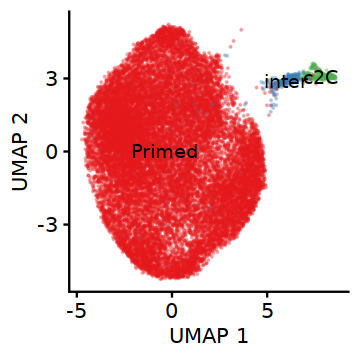

In [17]:
options(repr.plot.width=3,repr.plot.height=3)
ggplot(dat.fig4b,aes(UMAP_1,UMAP_2,col=res.name2)) + geom_point(size=.1,alpha=.1) +
   scale_color_manual(values=brewer.pal("Set1",n=4)) + xlab("UMAP 1") + ylab("UMAP 2") + 
   geom_text(data = centers, mapping = aes(label = res.name2),col="black")  +
   theme(text = element_text(size=12),legend.position="none")

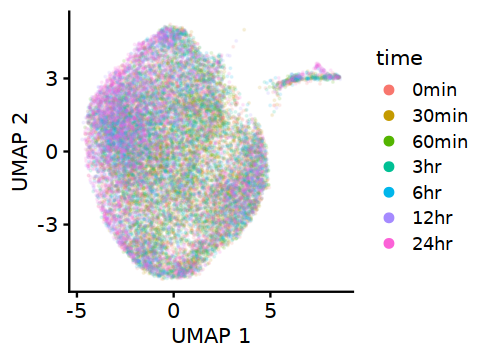

In [21]:
options(repr.plot.width=4,repr.plot.height=3)
ggplot(dat.fig4b,aes(UMAP_1,UMAP_2,col=time)) + geom_point(size=.1,alpha=.1) +
   xlab("UMAP 1") + ylab("UMAP 2") + 
   theme(text = element_text(size=12)) +
   guides(colour = guide_legend(ncol=1,override.aes = list(size=2,alpha=1))) 

### Fig 4c

In [22]:
dat.fig4c <- readRDS("Fig4c.rds")

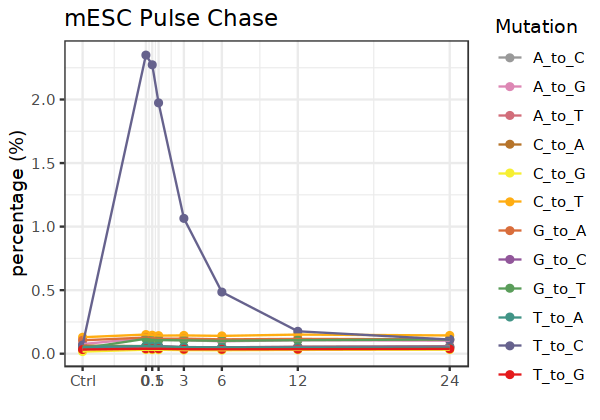

In [23]:
options(repr.plot.width=5,repr.plot.height=3.5)
ggplot(dat.fig4c,aes(variable,value2,group=type,col=type)) + geom_point() + geom_line() + theme_bw() + ylab("percentage (%)") + xlab("") +
  scale_colour_manual("Mutation",values=rev(colorRampPalette(brewer.pal(9,"Set1"))(12))) + ggtitle("mESC Pulse Chase") +
  scale_x_continuous(breaks = c(-5,0,0.5,1,3,6,12,24),labels = c("Ctrl",0,0.5,1,3,6,12,24))

### Fig 4d

In [48]:
dat.fig4d.p1 <- readRDS("Fig4d_part1_cc_corrected.rds")

In [49]:
library(cowplot)
library(MASS)
library(ggplot2)
library(viridis)
get_density <- function(x, y, ...) {
  dens <- MASS::kde2d(x, y, ...)
  ix <- findInterval(x, dens$x)
  iy <- findInterval(y, dens$y)
  ii <- cbind(ix, iy)
  return(dens$z[ii])
}

Warning message:
“Removed 2 rows containing missing values (geom_point).”


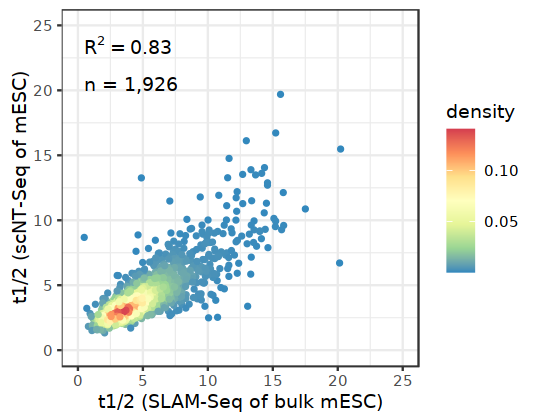

In [51]:
dat <- dat.fig4d.p1
dat$density <- get_density(dat$x, dat$y, n = 1000)

options(repr.plot.height=3.5,repr.plot.width=4.5)
ggplot(dat) + geom_point(aes(x, y, color = density),size=1) + scale_color_distiller(palette = "Spectral") +
 xlab("t1/2 (SLAM-Seq of bulk mESC)") + ylab("t1/2 (scNT-Seq of mESC)") + 
 annotate("text",x=.5,y=23.5,label="R^2==0.83",parse = TRUE,hjust=0) + 
 annotate("text",x=.5,y=20.5,label="n = 1,926",hjust=0) + 
 ylim(0,25) + xlim(0,25) + theme_bw() + coord_fixed(ratio = 1)

In [33]:
dat.fig4d.p2 <- readRDS("Fig4d_part2.rds")

In [35]:
dat <- dat.fig4d.p2 %>% dplyr::rename(x=hf.slam,y=hf.4h)
dat$density <- get_density(dat$x, dat$y, n = 1000)

Warning message:
“Removed 96 rows containing missing values (geom_point).”


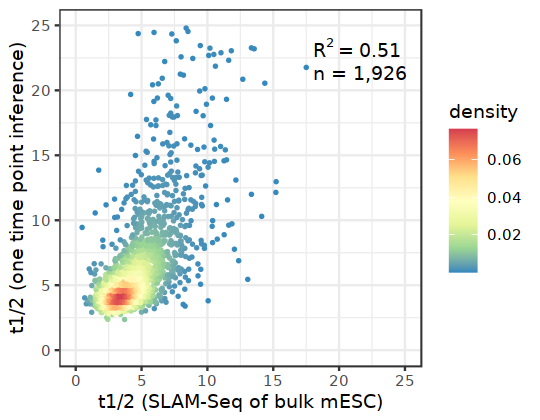

In [38]:
options(repr.plot.height=3.5,repr.plot.width=4.5)
ggplot(dat) + geom_point(aes(x, y, color = density),size=.5) + scale_color_distiller(palette = "Spectral") +
 xlab("t1/2 (SLAM-Seq of bulk mESC)") + ylab("t1/2 (one time point inference)") + xlim(0,25) + ylim(0,25)+ 
 theme_bw() + 
 annotate("text",x=18,y=23.3,label="R^{2}==0.51",parse = TRUE,hjust=0) + 
 annotate("text",x=18,y=21.3,label="n = 1,926",hjust=0) 

### Fig 4e

In [44]:
dat.fig4e <- readRDS("Fig4e.rds")

In [45]:
library(pheatmap)

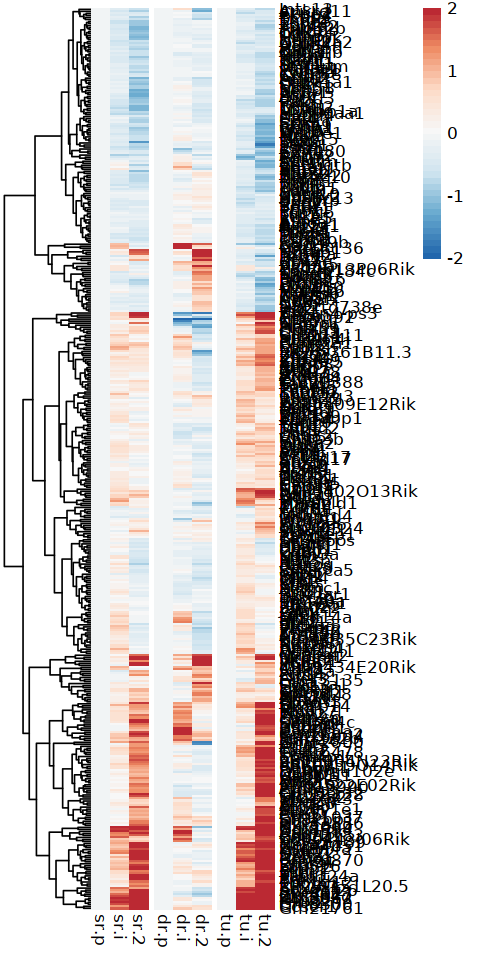

In [47]:
options(repr.plot.width=4,repr.plot.height=8)
pheatmap(dat.fig4e,scale = "none",cluster_cols = FALSE,
                   color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdBu")))(length(seq(-2, 2, by = .1))),
                   breaks = seq(-2, 2, by = .1),
                   gaps_col = c(3,6))